Import library

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

Load Dataset music

In [50]:
df = pd.read_csv('dataset/music_data.csv')
df.head()    

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Hapus kolom indeks supaya lebih rapi

In [51]:
# Hapus kolom indeks
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
    print("Kolom 'Unnamed: 0' dihapus.")

Kolom 'Unnamed: 0' dihapus.


Cek kembali dataset

In [52]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Check duplikat bedasarkan track_id

In [53]:
print(f"Jumlah baris sebelum de-duplikasi: {len(df)}")

# Cek duplikat berdasarkan kombinasi track_id dan track_name
initial_duplicates = df.duplicated(subset=['track_id', 'track_name']).sum()

if initial_duplicates > 0:
    print(f"Menemukan {initial_duplicates} baris duplikat berdasarkan 'track_id' dan 'track_name'. Menghapus...")
    df = df.drop_duplicates(subset=['track_id'], keep='first')
    df = df.drop_duplicates(subset=['track_name'], keep='first')
    print(f"Jumlah baris setelah de-duplikasi: {len(df)}")

    # Simpan dataframe yang sudah dibersihkan ke CSV baru
    df.to_csv('dataset/cleaned_data.csv', index=False)
    print("Dataframe yang sudah dibersihkan telah disimpan ke 'cleaned_data.csv'")
else:
    print("Tidak ditemukan baris duplikat berdasarkan 'track_id' dan 'track_name'.")


Jumlah baris sebelum de-duplikasi: 114000
Menemukan 24259 baris duplikat berdasarkan 'track_id' dan 'track_name'. Menghapus...
Jumlah baris setelah de-duplikasi: 73609
Dataframe yang sudah dibersihkan telah disimpan ke 'cleaned_data.csv'


Check null di kolom

In [54]:
# Check apakah ada null di kolom 
print("\nJumlah nilai null per kolom (setelah de-duplikasi):")
print(df.isnull().sum())


Jumlah nilai null per kolom (setelah de-duplikasi):
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


Rekayasa Fitur - Pelabelan Mood

In [55]:
def assign_mood(row):
    valence = row['valence']
    energy = row['energy']
    danceability = row['danceability']
    instrumentalness = row['instrumentalness']
    tempo = row['tempo']
    acousticness = row.get('acousticness', 0)  # Menggunakan 0 jika tidak tersedia
    
    # Happy: Energik, positif, danceable
    if energy > 0.7 and valence > 0.6 and danceability > 0.6:
        return 'Happy'
    
    # Sad: Energi rendah, valence rendah, sering akustik
    elif energy < 0.4 and valence < 0.4 and acousticness > 0.5:
        return 'Sad'
    
    # Anger: Sangat energik, valence rendah, tempo tinggi
    elif energy > 0.75 and valence < 0.35 and tempo > 140:
        return 'Anger'
    
    # Focused: Instrumental, tidak terlalu energik, tempo moderat
    elif instrumentalness > 0.6 and energy < 0.5 and tempo < 115 and danceability < 0.5:
        return 'Focused'
    
    # Romantic: Valence dan energi sedang, tempo sedang
    elif 0.4 < valence < 0.7 and 0.2 < energy < 0.6 and 60 < tempo < 125:
        return 'Romantic'
    
    # Relaxed/Chill: Energi rendah tapi valence tinggi
    elif energy < 0.4 and valence > 0.5:
        return 'Relaxed'
    
    # Fallback logic dengan lebih banyak nuansa
    else:
        if valence > 0.6 and energy > 0.6:
            return 'Happy'
        elif valence < 0.4 and energy < 0.4:
            return 'Sad'
        elif valence < 0.4 and energy > 0.6:
            return 'Anger'
        elif valence > 0.5 and energy < 0.5:
            return 'Relaxed'
        else:
            return 'Neutral'
# Terapkan fungsi untuk membuat kolom 'mood'
df['mood'] = df.apply(assign_mood, axis=1)

print("\nDistribusi Mood yang Dihasilkan:")
print(df['mood'].value_counts())
print(f"Total baris setelah pelabelan mood (dan potensi filtering): {len(df)}")

# Cek jika ada mood yang tidak terlabel (None)
if df['mood'].isnull().any():
    print("\nPeringatan: Beberapa baris tidak mendapatkan label mood.")


Distribusi Mood yang Dihasilkan:
mood
Neutral     20935
Happy       18026
Anger       15552
Sad          9850
Romantic     4963
Relaxed      3789
Focused       494
Name: count, dtype: int64
Total baris setelah pelabelan mood (dan potensi filtering): 73609


Pemilihan fitur (x) dan target (y)

In [56]:
# Pilih fitur numerik yang akan digunakan untuk melatih model
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'mode', 'duration_ms'] 
target = 'mood'

# Pisahkan fitur (X) dan target (y)
X = df[features]
y = df[target]

# Mengisi nilai NaN dengan median
print("\nMengisi nilai NaN pada fitur (X) dengan median kolom...")
X = X.fillna(X.median())

# Verifikasi bahwa tidak ada NaN lagi di X
print("Jumlah NaN di X setelah diisi:")
print(X.isnull().sum())


Mengisi nilai NaN pada fitur (X) dengan median kolom...
Jumlah NaN di X setelah diisi:
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
mode                0
duration_ms         0
dtype: int64


Pembagian Data training dan testing

In [ ]:
# Pembagian Data 
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,       # Ukuran test set 25%
    random_state=42,      # Untuk reproduktifitas
    stratify=y            # untuk menjaga proporsi kelas
)

print("\nUkuran Data:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

print("\nDistribusi Mood di Training Set:")
print(y_train.value_counts(normalize=True))
print("\nDistribusi Mood di Test Set:")
print(y_test.value_counts(normalize=True))


Ukuran Data:
X_train: (55206, 11)
X_test: (18403, 11)
y_train: (55206,)
y_test: (18403,)

Distribusi Mood di Training Set:
mood
Neutral     0.284407
Happy       0.244883
Anger       0.211281
Sad         0.133808
Romantic    0.067420
Relaxed     0.051480
Focused     0.006720
Name: proportion, dtype: float64

Distribusi Mood di Test Set:
mood
Neutral     0.284410
Happy       0.244906
Anger       0.211270
Sad         0.133837
Romantic    0.067435
Relaxed     0.051459
Focused     0.006684
Name: proportion, dtype: float64


Feature Scaling supaya memiliki rentang yang sama

In [ ]:
scaler = StandardScaler()

# Fit scaler HANYA pada data training
X_train_scaled = scaler.fit_transform(X_train)

# Transform data training dan testing dengan scaler yang sama
X_test_scaled = scaler.transform(X_test)
print("\nFitur berhasil di-scaling.")


Fitur berhasil di-scaling.


Training model menggunakan Random forest

In [ ]:
model = RandomForestClassifier(
    n_estimators=150,       # Jumlah decision tree
    random_state=42,
    class_weight='balanced', # Membuat distribusi mood lebih merata
    n_jobs=-1               # Gunakan semua core CPU 
)

print("\nMemulai pelatihan model Random Forest...")
# Latih model
model.fit(X_train_scaled, y_train)

print("Pelatihan model selesai.")


Memulai pelatihan model Random Forest...
Pelatihan model selesai.


Evaluasi model 


Membuat prediksi pada data testing...

Akurasi Model: 0.9991

Laporan Klasifikasi:
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00      3888
     Focused       1.00      0.94      0.97       123
       Happy       1.00      1.00      1.00      4507
     Neutral       1.00      1.00      1.00      5234
     Relaxed       1.00      1.00      1.00       947
    Romantic       0.99      1.00      0.99      1241
         Sad       1.00      1.00      1.00      2463

    accuracy                           1.00     18403
   macro avg       1.00      0.99      0.99     18403
weighted avg       1.00      1.00      1.00     18403


Confusion Matrix:


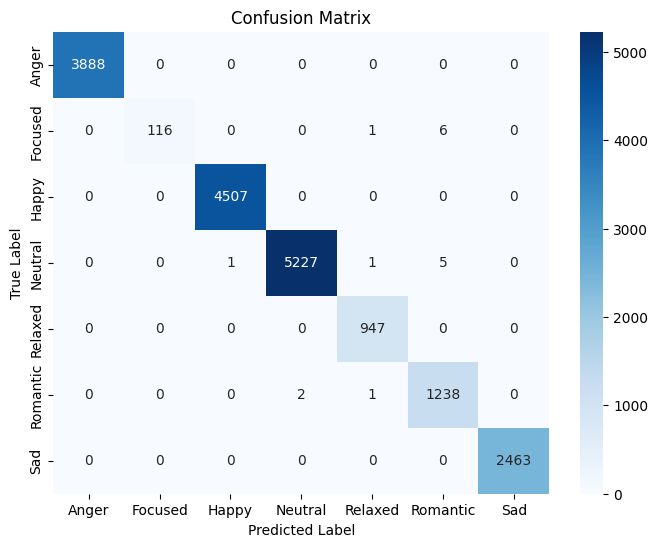

In [ ]:
print("\nMembuat prediksi pada data testing...")
# Prediksi
y_pred = model.predict(X_test_scaled)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {accuracy:.4f}")

print("\nLaporan Klasifikasi:")
mood_labels = sorted(y_test.unique())
print(classification_report(y_test, y_pred, labels=mood_labels, target_names=mood_labels))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred, labels=mood_labels)

# Visualisasi CM
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=mood_labels, yticklabels=mood_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Testing semua jenis mood

In [ ]:
# Fungsi rekomendasi musik berdasarkan mood

def recommend_music(mood, df, num_recommendations=10):
    # Filter lagu dengan mood yang cocok
    songs = df[df['predicted_mood'] == mood].copy()    
    if songs.empty:
        return f"Tidak ditemukan lagu dengan mood '{mood}'."

    # Urutkan berdasarkan popularitas, ambil yang teratas
    if 'popularity' not in songs.columns:
        return "Kolom 'popularity' tidak tersedia."

    top_songs = songs.sort_values(by='popularity', ascending=False).head(num_recommendations)
    if top_songs.empty:
        return f"Tidak ada lagu populer yang cocok untuk mood '{mood}'."

    return top_songs

print("Menyiapkan data dan membuat prediksi mood...")

# Copy data utama
df_full = df.copy()

# Pastikan kolom fitur tersedia
if not all(col in df_full.columns for col in features):
    raise ValueError("Beberapa kolom fitur hilang dari dataset.")

# Tangani nilai kosong hanya untuk kolom fitur numerik
df_full[features] = df_full[features].fillna(df_full[features].median())

# Cek kolom yang diperlukan
required = ['track_id', 'track_genre', 'popularity', 'track_name', 'artists', 'album_name'] + features
missing = [col for col in required if col not in df_full.columns]
if missing:
    raise ValueError(f"Kolom berikut hilang: {missing}")

# Lakukan scaling fitur
try:
    scaled_features = scaler.transform(df_full[features])
except ValueError as e:
    print(f"Gagal melakukan scaling: {e}")

# Prediksi mood dengan model
try:
    df_full['predicted_mood'] = model.predict(scaled_features)
    print("Prediksi mood berhasil ditambahkan.")
    print("Distribusi mood yang diprediksi:")
    print(df_full['predicted_mood'].value_counts())
except Exception as e:
    print(f"Gagal melakukan prediksi mood: {e}")


# UJI COBA REKOMENDASI 
try:
    test_moods = [m for m in df_full['predicted_mood'].unique() if pd.notna(m)]
    print(f"Mood yang akan diuji: {test_moods}")
except KeyError:
    print("Kolom 'predicted_mood' tidak ditemukan.")
    test_moods = []

print("\n========== MULAI UJI COBA ==========\n")

for mood in test_moods:
    print(f"--- Mood: {mood} ---")
    result = recommend_music(mood, df_full, num_recommendations=10)

    if isinstance(result, pd.DataFrame) and not result.empty:
        cols = ['track_name', 'artists', 'album_name', 'track_genre', 'popularity', 'predicted_mood']
        display_cols = [col for col in cols if col in result.columns]
        print(result[display_cols].to_string(index=False))
    else:
        print(result)

    print("-" * 40)

print("\n========== UJI COBA SELESAI ==========")

Menyiapkan data dan membuat prediksi mood...
Prediksi mood berhasil ditambahkan.
Distribusi mood yang diprediksi:
predicted_mood
Neutral     20930
Happy       18027
Anger       15552
Sad          9850
Romantic     4971
Relaxed      3792
Focused       487
Name: count, dtype: int64
Mood yang akan diuji: ['Relaxed', 'Sad', 'Neutral', 'Romantic', 'Anger', 'Happy', 'Focused']

========== MULAI UJI COBA ==========

--- Mood: Relaxed ---
                       track_name                     artists                          album_name track_genre  popularity predicted_mood
                   cómo dormiste?                      Rels B                      cómo dormiste?      latino          89        Relaxed
   For My Hand (feat. Ed Sheeran)        Burna Boy;Ed Sheeran                        Love, Damini       dance          83        Relaxed
Stuck with U (with Justin Bieber) Ariana Grande;Justin Bieber                        Stuck with U       dance          83        Relaxed
                T

Simpan model dan scaler

In [ ]:
joblib.dump(model, 'models/mood_model.joblib')
joblib.dump(scaler, 'models/mood_scaler.joblib')
print("Model dan Scaler berhasil disimpan ke folder 'models/'.")

Model dan Scaler berhasil disimpan ke folder 'models/'.
